# Introduction to H2O

### This is an quick introduction to H2O with the purpose of introducing H2O's AutoML and Hyperparameter capabilities. The way H2O is installed and initialized is for educational purposes only, this should not be used in a production environment.

In [46]:
#Import H2O and other libraries that will be used in this tutorial 
import h2o
import matplotlib as plt

#Import the Estimators
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator

#Import h2o grid search 
import h2o.grid 
from h2o.grid.grid_search import H2OGridSearch

In [469]:
import h2o
h2o.init(max_mem_size=4)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/ubuntu/Anaconda/envs/keras_env/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpy175_04e
  JVM stdout: /tmp/tmpy175_04e/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpy175_04e/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54331
Connecting to H2O server at http://127.0.0.1:54331 ... successful.


H2O cluster uptime:,11 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.2
H2O cluster version age:,1 month and 13 days
H2O cluster name:,H2O_from_python_unknownUser_kihfxi
H2O cluster total nodes:,1
H2O cluster free memory:,4 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


## Load a loan dataset that has 500k records. The goal here is to determine who is likely to default based on a set of features

In [470]:
loan_level = h2o.import_file("https://s3.amazonaws.com/data.h2o.ai/DAI-Tutorials/loan_level_500k.csv")

Parse progress: |███████████████████████████████████████████████████████████| 100%


In [450]:
loan_level

CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
669,200206,N,202901,nan,0,1,O,80,33,162000,80,7.12,R,N,FRM,WV,SF,26100,F199Q1000004,P,320,2,Other sellers,Other servicers,TRUE,FALSE
732,199904,N,202903,17140,0,1,O,25,10,53000,25,6.5,R,N,FRM,OH,SF,45200,F199Q1000005,N,360,1,Other sellers,Other servicers,TRUE,FALSE
679,200208,N,202902,15940,30,1,O,91,48,133000,91,6.75,R,N,FRM,OH,SF,44700,F199Q1000007,P,319,1,Other sellers,Other servicers,TRUE,FALSE
721,200209,N,202902,38060,0,1,O,39,13,174000,39,6.625,T,N,FRM,AZ,SF,85200,F199Q1000013,N,318,2,Other sellers,Other servicers,TRUE,FALSE
618,200210,N,202902,10420,25,1,O,85,24,122000,85,6.375,R,N,FRM,OH,SF,44200,F199Q1000015,N,317,2,Other sellers,Other servicers,TRUE,FALSE
738,200211,N,202903,10420,0,1,O,73,44,218000,73,6,R,N,FRM,OH,SF,44300,F199Q1000016,P,317,2,Other sellers,Other servicers,TRUE,FALSE
761,200211,N,202904,nan,0,1,O,73,31,138000,73,6.375,R,N,FRM,SC,PU,29500,F199Q1000017,P,318,2,Other sellers,Other servicers,TRUE,FALSE
707,200211,N,202903,33340,0,1,O,60,57,136000,60,6.25,R,N,FRM,WI,SF,53000,F199Q1000018,C,317,2,Other sellers,Other servicers,TRUE,FALSE
760,200211,N,202903,33340,0,1,O,63,30,79000,63,6.125,R,N,FRM,WI,SF,53000,F199Q1000019,N,317,2,Other sellers,Other servicers,TRUE,FALSE
691,200302,N,202901,15940,0,1,O,65,25,130000,65,5.875,R,N,FRM,OH,SF,44700,F199Q1000023,P,312,2,Other sellers,Other servicers,TRUE,FALSE


In [428]:
type(loan_level)

h2o.frame.H2OFrame

In [429]:
loan_level.describe()

Rows:500137
Cols:27




,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
type,int,int,enum,int,int,int,int,enum,int,int,int,int,real,enum,enum,enum,enum,enum,int,string,enum,int,int,enum,enum,enum,enum
mins,300.0,199901.0,,202402.0,10180.0,0.0,1.0,,6.0,1.0,8000.0,6.0,4.625,,,,,,600.0,NaN,,301.0,1.0,,,,
mean,712.5362124215479,200025.43095191906,,203023.19587233098,30777.824739295032,7.744531707523449,1.0288902574110124,,76.05357071446291,32.917540518705366,136493.484785169,75.71071405720127,7.18268686379932,,,,,,55490.85713828669,NaN,,359.8554696013292,1.630294664826265,,,,
maxs,839.0,201103.0,,204101.0,49740.0,55.0,4.0,,180.0,65.0,578000.0,100.0,11.5,,,,,,99900.0,NaN,,362.0,2.0,,,,
sigma,54.791261974088236,109.81554141481806,,110.38418855756446,11333.401144164467,12.046545969492545,0.21839057355939107,,15.139986048512696,11.111799994455254,60968.74306564561,14.937717088968691,0.5799408623980612,,,,,,29505.38225880302,NaN,,1.9082507104186943,0.48272535304031616,,,,
zeros,0,0,,0,0,309979,0,,0,0,0,0,0,,,,,,0,0,,0,0,,,,
missing,2711,0,0,0,70149,51048,3,0,13,14929,0,9,0,0,0,0,0,0,31,0,0,0,247,0,0,0,0
0,669.0,200206.0,N,202901.0,nan,0.0,1.0,O,80.0,33.0,162000.0,80.0,7.12,R,N,FRM,WV,SF,26100.0,F199Q1000004,P,320.0,2.0,Other sellers,Other servicers,TRUE,FALSE
1,732.0,199904.0,N,202903.0,17140.0,0.0,1.0,O,25.0,10.0,53000.0,25.0,6.5,R,N,FRM,OH,SF,45200.0,F199Q1000005,N,360.0,1.0,Other sellers,Other servicers,TRUE,FALSE
2,679.0,200208.0,N,202902.0,15940.0,30.0,1.0,O,91.0,48.0,133000.0,91.0,6.75,R,N,FRM,OH,SF,44700.0,F199Q1000007,P,319.0,1.0,Other sellers,Other servicers,TRUE,FALSE


In [471]:
train, valid, test = loan_level.split_frame([0.7, 0.15], seed=42)
print("train:%d valid:%d test:%d" % (train.nrows, valid.nrows, test.nrows))

train:350268 valid:74971 test:74898


In [472]:
y = "DELINQUENT"
ignore = ["DELINQUENT", "PREPAID", "PREPAYMENT_PENALTY_MORTGAGE_FLAG", "PRODUCT_TYPE"] 
x = list(set(train.names) - set(ignore))

## Initialize a GLM 

In [473]:
glm = H2OGeneralizedLinearEstimator(family = "binomial", seed=42, keep_cross_validation_predictions= True, model_id = 'default_glm')

In [474]:
glm.train(x = x, y = y, training_frame = train, validation_frame = valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [464]:
# For details on interpreting some of these metrics, 
# visit https://www.datascienceblog.net/post/machine-learning/interpreting_generalized_linear_models/
# Null degrees of freedom = Number of observations - 1
# Residual degrees of freedom = Null degrees of freedom - Number of active predictors
glm

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  default_glm


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 6.626E-5 )",161,88,7,py_2251_sid_8f99




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.03142171957132889
RMSE: 0.17726172618850605
LogLoss: 0.12328049878526554
Null degrees of freedom: 350267
Residual degrees of freedom: 350179
Null deviance: 108932.13150368733
Residual deviance: 86362.42749703476
AIC: 86540.42749703476
AUC: 0.8503835552015756
AUCPR: 0.20663491297269101
Gini: 0.7007671104031512

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1282356363206364: 


,,FALSE,TRUE,Error,Rate
0,FALSE,321979.0,15628.0,0.0463,(15628.0/337607.0)
1,TRUE,7881.0,4780.0,0.6225,(7881.0/12661.0)
2,Total,329860.0,20408.0,0.0671,(23509.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.128236,0.289093,205.0
1,max f2,0.067101,0.386447,264.0
2,max f0point5,0.217436,0.288113,148.0
3,max accuracy,0.975876,0.963851,0.0
4,max precision,0.552741,0.406752,45.0
5,max recall,0.000817,1.000000,398.0
6,max specificity,0.975876,0.999997,0.0
7,max absolute_mcc,0.108858,0.267681,220.0
8,max min_per_class_accuracy,0.039128,0.772117,306.0
9,max mean_per_class_accuracy,0.034376,0.774466,313.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  3.61 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010001,0.315606,10.503740,10.503740,0.379675,0.447135,0.379675,0.447135,0.105047,0.105047,950.373986,950.373986
1,,2,0.020002,0.231615,7.763290,9.133515,0.280617,0.268426,0.330146,0.357781,0.077640,0.182687,676.329044,813.351515
2,,3,0.030003,0.189186,6.175883,8.147638,0.223237,0.209056,0.294509,0.308206,0.061764,0.244451,517.588314,714.763781
3,,4,0.040001,0.160763,5.340267,7.445946,0.193033,0.174289,0.269146,0.274734,0.053392,0.297844,434.026745,644.594550
4,,5,0.050002,0.140680,4.470013,6.850725,0.161576,0.150204,0.247630,0.249826,0.044704,0.342548,347.001260,585.072494
5,,6,0.100001,0.087297,3.363160,5.106992,0.121567,0.109556,0.184600,0.179693,0.168154,0.510702,236.316030,410.699240
6,,7,0.150002,0.062777,2.337808,4.183913,0.084504,0.073795,0.151234,0.144393,0.116894,0.627597,133.780791,318.391334
7,,8,0.200001,0.048144,1.679211,3.557756,0.060698,0.054923,0.128601,0.122026,0.083959,0.711555,67.921061,255.775553
8,,9,0.300002,0.031478,1.149192,2.754901,0.041539,0.038923,0.099580,0.094325,0.114920,0.826475,14.919176,175.490094
9,,10,0.399999,0.021718,0.625557,2.222576,0.022612,0.026218,0.080339,0.077298,0.062554,0.889029,-37.444271,122.257643




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.031075117591417643
RMSE: 0.17628135917168794
LogLoss: 0.12274529844188285
Null degrees of freedom: 74970
Residual degrees of freedom: 74882
Null deviance: 22974.597464481732
Residual deviance: 18404.6755389728
AIC: 18582.6755389728
AUC: 0.8450178237681047
AUCPR: 0.19799604817730218
Gini: 0.6900356475362095

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12605795173473466: 


,,FALSE,TRUE,Error,Rate
0,FALSE,68851.0,3462.0,0.0479,(3462.0/72313.0)
1,TRUE,1647.0,1011.0,0.6196,(1647.0/2658.0)
2,Total,70498.0,4473.0,0.0681,(5109.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.126058,0.283551,200.0
1,max f2,0.063173,0.373832,265.0
2,max f0point5,0.229445,0.289993,134.0
3,max accuracy,0.964445,0.964533,0.0
4,max precision,0.395160,0.398104,76.0
5,max recall,0.000476,1.000000,399.0
6,max specificity,0.964445,0.999986,0.0
7,max absolute_mcc,0.122043,0.259790,204.0
8,max min_per_class_accuracy,0.038399,0.766861,303.0
9,max mean_per_class_accuracy,0.036174,0.767391,307.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.62 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010004,0.317794,10.417340,10.417340,0.369333,0.455618,0.369333,0.455618,0.104214,0.104214,941.733985,941.733985
1,,2,0.020008,0.234316,8.273700,9.345520,0.293333,0.270835,0.331333,0.363227,0.082769,0.186983,727.369952,834.551969
2,,3,0.030012,0.187723,6.430921,8.373987,0.228000,0.208398,0.296889,0.311617,0.064334,0.251317,543.092099,737.398679
3,,4,0.040002,0.159223,4.481294,7.401787,0.158879,0.172164,0.262421,0.276789,0.044771,0.296087,348.129435,640.178718
4,,5,0.050006,0.139193,4.287281,6.778720,0.152000,0.149074,0.240331,0.251239,0.042889,0.338977,328.728066,577.871972
5,,6,0.100012,0.087251,3.197509,4.988115,0.113364,0.109587,0.176847,0.180413,0.159895,0.498871,219.750930,398.811451
6,,7,0.150005,0.062508,2.325398,4.100700,0.082444,0.073822,0.145385,0.144889,0.116253,0.615124,132.539762,310.070006
7,,8,0.200011,0.048269,1.722893,3.506209,0.061083,0.054932,0.124308,0.122398,0.086155,0.701279,72.289325,250.620872
8,,9,0.300009,0.031184,1.124921,2.712481,0.039883,0.038895,0.096168,0.094565,0.112491,0.813770,12.492095,171.248142
9,,10,0.400008,0.021592,0.665923,2.200859,0.023609,0.026053,0.078029,0.077438,0.066591,0.880361,-33.407690,120.085890




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-03-04 19:32:35,0.000 sec,0,54466.065752,0.155498
1,,2020-03-04 19:32:35,0.733 sec,1,50061.613368,0.144447
2,,2020-03-04 19:32:36,1.081 sec,2,43570.207802,0.125483
3,,2020-03-04 19:32:36,1.407 sec,3,43215.311321,0.124491
4,,2020-03-04 19:32:36,1.750 sec,4,43195.943426,0.124463
5,,2020-03-04 19:32:37,2.113 sec,5,43195.779638,0.124463
6,,2020-03-04 19:32:38,2.902 sec,6,43182.000891,0.124441
7,,2020-03-04 19:32:38,3.207 sec,7,43181.213749,0.124441


## Look at the variable importance

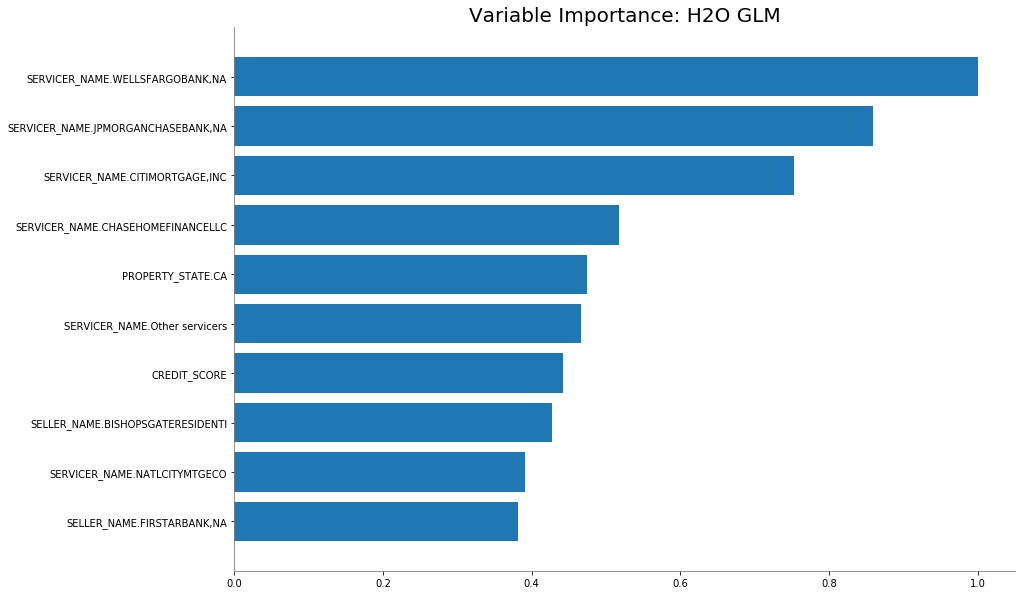

In [480]:
glm.varimp_plot()

In [436]:
default_performance = glm.model_performance(valid)
default_performance


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.031075117591417643
RMSE: 0.17628135917168794
LogLoss: 0.12274529844188285
Null degrees of freedom: 74970
Residual degrees of freedom: 74882
Null deviance: 22974.597464481732
Residual deviance: 18404.6755389728
AIC: 18582.6755389728
AUC: 0.8450178237681047
AUCPR: 0.19799604817730218
Gini: 0.6900356475362095

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12605795173473466: 


,,FALSE,TRUE,Error,Rate
0,FALSE,68851.0,3462.0,0.0479,(3462.0/72313.0)
1,TRUE,1647.0,1011.0,0.6196,(1647.0/2658.0)
2,Total,70498.0,4473.0,0.0681,(5109.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.126058,0.283551,200.0
1,max f2,0.063173,0.373832,265.0
2,max f0point5,0.229445,0.289993,134.0
3,max accuracy,0.964445,0.964533,0.0
4,max precision,0.395160,0.398104,76.0
5,max recall,0.000476,1.000000,399.0
6,max specificity,0.964445,0.999986,0.0
7,max absolute_mcc,0.122043,0.259790,204.0
8,max min_per_class_accuracy,0.038399,0.766861,303.0
9,max mean_per_class_accuracy,0.036174,0.767391,307.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.62 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010004,0.317794,10.417340,10.417340,0.369333,0.455618,0.369333,0.455618,0.104214,0.104214,941.733985,941.733985
1,,2,0.020008,0.234316,8.273700,9.345520,0.293333,0.270835,0.331333,0.363227,0.082769,0.186983,727.369952,834.551969
2,,3,0.030012,0.187723,6.430921,8.373987,0.228000,0.208398,0.296889,0.311617,0.064334,0.251317,543.092099,737.398679
3,,4,0.040002,0.159223,4.481294,7.401787,0.158879,0.172164,0.262421,0.276789,0.044771,0.296087,348.129435,640.178718
4,,5,0.050006,0.139193,4.287281,6.778720,0.152000,0.149074,0.240331,0.251239,0.042889,0.338977,328.728066,577.871972
5,,6,0.100012,0.087251,3.197509,4.988115,0.113364,0.109587,0.176847,0.180413,0.159895,0.498871,219.750930,398.811451
6,,7,0.150005,0.062508,2.325398,4.100700,0.082444,0.073822,0.145385,0.144889,0.116253,0.615124,132.539762,310.070006
7,,8,0.200011,0.048269,1.722893,3.506209,0.061083,0.054932,0.124308,0.122398,0.086155,0.701279,72.289325,250.620872
8,,9,0.300009,0.031184,1.124921,2.712481,0.039883,0.038895,0.096168,0.094565,0.112491,0.813770,12.492095,171.248142
9,,10,0.400008,0.021592,0.665923,2.200859,0.023609,0.026053,0.078029,0.077438,0.066591,0.880361,-33.407690,120.085890


In [440]:
glm.show()

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  default_glm


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 6.626E-5 )",161,88,7,py_2244_sid_80e0




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.03142171957132889
RMSE: 0.17726172618850605
LogLoss: 0.12328049878526554
Null degrees of freedom: 350267
Residual degrees of freedom: 350179
Null deviance: 108932.13150368733
Residual deviance: 86362.42749703476
AIC: 86540.42749703476
AUC: 0.8503835552015756
AUCPR: 0.20663491297269101
Gini: 0.7007671104031512

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1282356363206364: 


,,FALSE,TRUE,Error,Rate
0,FALSE,321979.0,15628.0,0.0463,(15628.0/337607.0)
1,TRUE,7881.0,4780.0,0.6225,(7881.0/12661.0)
2,Total,329860.0,20408.0,0.0671,(23509.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.128236,0.289093,205.0
1,max f2,0.067101,0.386447,264.0
2,max f0point5,0.217436,0.288113,148.0
3,max accuracy,0.975876,0.963851,0.0
4,max precision,0.552741,0.406752,45.0
5,max recall,0.000817,1.000000,398.0
6,max specificity,0.975876,0.999997,0.0
7,max absolute_mcc,0.108858,0.267681,220.0
8,max min_per_class_accuracy,0.039128,0.772117,306.0
9,max mean_per_class_accuracy,0.034376,0.774466,313.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  3.61 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010001,0.315606,10.503740,10.503740,0.379675,0.447135,0.379675,0.447135,0.105047,0.105047,950.373986,950.373986
1,,2,0.020002,0.231615,7.763290,9.133515,0.280617,0.268426,0.330146,0.357781,0.077640,0.182687,676.329044,813.351515
2,,3,0.030003,0.189186,6.175883,8.147638,0.223237,0.209056,0.294509,0.308206,0.061764,0.244451,517.588314,714.763781
3,,4,0.040001,0.160763,5.340267,7.445946,0.193033,0.174289,0.269146,0.274734,0.053392,0.297844,434.026745,644.594550
4,,5,0.050002,0.140680,4.470013,6.850725,0.161576,0.150204,0.247630,0.249826,0.044704,0.342548,347.001260,585.072494
5,,6,0.100001,0.087297,3.363160,5.106992,0.121567,0.109556,0.184600,0.179693,0.168154,0.510702,236.316030,410.699240
6,,7,0.150002,0.062777,2.337808,4.183913,0.084504,0.073795,0.151234,0.144393,0.116894,0.627597,133.780791,318.391334
7,,8,0.200001,0.048144,1.679211,3.557756,0.060698,0.054923,0.128601,0.122026,0.083959,0.711555,67.921061,255.775553
8,,9,0.300002,0.031478,1.149192,2.754901,0.041539,0.038923,0.099580,0.094325,0.114920,0.826475,14.919176,175.490094
9,,10,0.399999,0.021718,0.625557,2.222576,0.022612,0.026218,0.080339,0.077298,0.062554,0.889029,-37.444271,122.257643




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.031075117591417643
RMSE: 0.17628135917168794
LogLoss: 0.12274529844188285
Null degrees of freedom: 74970
Residual degrees of freedom: 74882
Null deviance: 22974.597464481732
Residual deviance: 18404.6755389728
AIC: 18582.6755389728
AUC: 0.8450178237681047
AUCPR: 0.19799604817730218
Gini: 0.6900356475362095

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12605795173473466: 


,,FALSE,TRUE,Error,Rate
0,FALSE,68851.0,3462.0,0.0479,(3462.0/72313.0)
1,TRUE,1647.0,1011.0,0.6196,(1647.0/2658.0)
2,Total,70498.0,4473.0,0.0681,(5109.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.126058,0.283551,200.0
1,max f2,0.063173,0.373832,265.0
2,max f0point5,0.229445,0.289993,134.0
3,max accuracy,0.964445,0.964533,0.0
4,max precision,0.395160,0.398104,76.0
5,max recall,0.000476,1.000000,399.0
6,max specificity,0.964445,0.999986,0.0
7,max absolute_mcc,0.122043,0.259790,204.0
8,max min_per_class_accuracy,0.038399,0.766861,303.0
9,max mean_per_class_accuracy,0.036174,0.767391,307.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.62 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010004,0.317794,10.417340,10.417340,0.369333,0.455618,0.369333,0.455618,0.104214,0.104214,941.733985,941.733985
1,,2,0.020008,0.234316,8.273700,9.345520,0.293333,0.270835,0.331333,0.363227,0.082769,0.186983,727.369952,834.551969
2,,3,0.030012,0.187723,6.430921,8.373987,0.228000,0.208398,0.296889,0.311617,0.064334,0.251317,543.092099,737.398679
3,,4,0.040002,0.159223,4.481294,7.401787,0.158879,0.172164,0.262421,0.276789,0.044771,0.296087,348.129435,640.178718
4,,5,0.050006,0.139193,4.287281,6.778720,0.152000,0.149074,0.240331,0.251239,0.042889,0.338977,328.728066,577.871972
5,,6,0.100012,0.087251,3.197509,4.988115,0.113364,0.109587,0.176847,0.180413,0.159895,0.498871,219.750930,398.811451
6,,7,0.150005,0.062508,2.325398,4.100700,0.082444,0.073822,0.145385,0.144889,0.116253,0.615124,132.539762,310.070006
7,,8,0.200011,0.048269,1.722893,3.506209,0.061083,0.054932,0.124308,0.122398,0.086155,0.701279,72.289325,250.620872
8,,9,0.300009,0.031184,1.124921,2.712481,0.039883,0.038895,0.096168,0.094565,0.112491,0.813770,12.492095,171.248142
9,,10,0.400008,0.021592,0.665923,2.200859,0.023609,0.026053,0.078029,0.077438,0.066591,0.880361,-33.407690,120.085890




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-03-04 19:12:38,0.000 sec,0,54466.065752,0.155498
1,,2020-03-04 19:12:39,1.291 sec,1,50061.613368,0.144447
2,,2020-03-04 19:12:39,1.647 sec,2,43570.207802,0.125483
3,,2020-03-04 19:12:40,2.012 sec,3,43215.311321,0.124491
4,,2020-03-04 19:12:40,2.357 sec,4,43195.943426,0.124463
5,,2020-03-04 19:12:40,2.634 sec,5,43195.779638,0.124463
6,,2020-03-04 19:12:41,3.444 sec,6,43182.000891,0.124441
7,,2020-03-04 19:12:42,3.799 sec,7,43181.213749,0.124441


## Random Forests

In [477]:
rf = H2ORandomForestEstimator (seed=42, keep_cross_validation_predictions= True, model_id='default_random_forest')
%time rf.train(x=x, y=y, training_frame=train, validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%
CPU times: user 610 ms, sys: 177 ms, total: 787 ms
Wall time: 52.1 s


In [478]:
rf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  default_random_forest


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,7598177.0,20.0,20.0,20.0,9881.0,11724.0,10834.34




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.03217049865504163
RMSE: 0.17936136332845384
LogLoss: 0.18808040483623228
Mean Per-Class Error: 0.26913311700258946
AUC: 0.8033610245821671
AUCPR: 0.19829396997668133
Gini: 0.6067220491643341

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16965556841371968: 


,,FALSE,TRUE,Error,Rate
0,FALSE,322113.0,15494.0,0.0459,(15494.0/337607.0)
1,TRUE,8417.0,4244.0,0.6648,(8417.0/12661.0)
2,Total,330530.0,19738.0,0.0683,(23911.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.169656,0.261983,199.0
1,max f2,0.088298,0.345701,268.0
2,max f0point5,0.285774,0.272404,131.0
3,max accuracy,0.570945,0.964276,43.0
4,max precision,0.998148,1.000000,0.0
5,max recall,0.000005,1.000000,399.0
6,max specificity,0.998148,1.000000,0.0
7,max absolute_mcc,0.152868,0.234623,211.0
8,max min_per_class_accuracy,0.037465,0.727384,331.0
9,max mean_per_class_accuracy,0.013706,0.730867,361.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  3.75 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010001,0.355807,10.811744,10.811744,0.390808,0.468185,0.390808,0.468185,0.108127,0.108127,981.174427,981.174427
1,,2,0.020002,0.276656,6.547068,8.679406,0.236654,0.311273,0.313731,0.389729,0.065477,0.173604,554.706793,767.940610
2,,3,0.030003,0.232143,5.172894,7.510569,0.186983,0.252600,0.271482,0.344019,0.051734,0.225338,417.289444,651.056888
3,,4,0.040001,0.202677,4.408091,6.735115,0.159338,0.217047,0.243452,0.312283,0.044072,0.269410,340.809059,573.511538
4,,5,0.050002,0.180995,4.011955,6.190452,0.145019,0.191749,0.223764,0.288175,0.040123,0.309533,301.195477,519.045216
5,,6,0.100218,0.117647,2.944402,4.563960,0.106430,0.144611,0.164972,0.216240,0.147856,0.457389,194.440231,356.395953
6,,7,0.150002,0.081530,2.086227,3.741617,0.075410,0.098156,0.135247,0.177049,0.103862,0.561251,108.622686,274.161694
7,,8,0.202559,0.062500,1.498295,3.159555,0.054158,0.070321,0.114207,0.149357,0.078746,0.639997,49.829529,215.955480
8,,9,0.300002,0.030525,1.059398,2.477410,0.038294,0.049436,0.089550,0.116902,0.103230,0.743227,5.939771,147.740996
9,,10,0.399999,0.008321,0.906742,2.084751,0.032776,0.016276,0.075357,0.091746,0.090672,0.833899,-9.325786,108.475142




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.030711574907505115
RMSE: 0.17524718230974531
LogLoss: 0.13267563440956423
Mean Per-Class Error: 0.24902444463874795
AUC: 0.8264832005859654
AUCPR: 0.22251050443797651
Gini: 0.6529664011719307

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18697871059179305: 


,,FALSE,TRUE,Error,Rate
0,FALSE,70118.0,2195.0,0.0304,(2195.0/72313.0)
1,TRUE,1858.0,800.0,0.699,(1858.0/2658.0)
2,Total,71976.0,2995.0,0.0541,(4053.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.186979,0.283036,162.0
1,max f2,0.093066,0.365102,244.0
2,max f0point5,0.286930,0.307132,109.0
3,max accuracy,0.507947,0.965133,43.0
4,max precision,0.996667,1.000000,0.0
5,max recall,0.000018,1.000000,399.0
6,max specificity,0.996667,1.000000,0.0
7,max absolute_mcc,0.186979,0.255541,162.0
8,max min_per_class_accuracy,0.041421,0.749436,313.0
9,max mean_per_class_accuracy,0.043029,0.750976,310.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.75 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010004,0.325072,12.372942,12.372942,0.438667,0.439038,0.438667,0.439038,0.123777,0.123777,1137.294156,1137.294156
1,,2,0.020008,0.248567,7.070252,9.721597,0.250667,0.282077,0.344667,0.360557,0.070730,0.194507,607.025232,872.159694
2,,3,0.030012,0.210902,5.716374,8.386523,0.202667,0.228056,0.297333,0.316390,0.057186,0.251693,471.637422,738.652270
3,,4,0.040002,0.185958,4.933190,7.524053,0.174900,0.197849,0.266756,0.286785,0.049285,0.300978,393.318958,652.405304
4,,5,0.050006,0.166226,3.723165,6.763673,0.132000,0.175703,0.239797,0.264562,0.037246,0.338224,272.316479,576.367262
5,,6,0.100012,0.107784,3.069609,4.916641,0.108829,0.133063,0.174313,0.198813,0.153499,0.491723,206.960893,391.664078
6,,7,0.150005,0.077850,2.016850,3.950216,0.071505,0.091579,0.140050,0.163074,0.100828,0.592551,101.684972,295.021566
7,,8,0.200011,0.059189,1.497187,3.336918,0.053081,0.066814,0.118306,0.139008,0.074868,0.667419,49.718671,233.691752
8,,9,0.300009,0.033730,1.087298,2.587078,0.038549,0.044971,0.091722,0.107663,0.108728,0.776147,8.729817,158.707775
9,,10,0.400008,0.021259,0.714833,2.119032,0.025343,0.025871,0.075128,0.087216,0.071482,0.847630,-28.516729,111.903210




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-03-04 20:01:32,0.019 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-03-04 20:01:33,0.898 sec,1.0,0.238486,1.772648,0.579630,0.060423,4.199508,0.074234,0.235348,1.725575,0.585285,0.060955,4.582604,0.070080
2,,2020-03-04 20:01:34,1.898 sec,2.0,0.230866,1.528793,0.597044,0.067676,4.380951,0.079206,0.205851,0.810013,0.641598,0.093820,6.506136,0.094797
3,,2020-03-04 20:01:35,3.100 sec,3.0,0.225162,1.355003,0.610057,0.073433,4.688304,0.078348,0.196177,0.601231,0.686345,0.119300,8.154991,0.092916
4,,2020-03-04 20:01:44,12.145 sec,15.0,0.190169,0.459076,0.717693,0.132585,7.710818,0.074577,0.178850,0.206530,0.790972,0.189184,10.868633,0.059076
5,,2020-03-04 20:02:14,41.407 sec,50.0,0.179361,0.188080,0.803361,0.198294,10.811744,0.068265,0.175247,0.132676,0.826483,0.222511,12.372942,0.054061



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,PROPERTY_STATE,42236.546875,1.000000,0.134475
1,CREDIT_SCORE,38299.613281,0.906788,0.121940
2,SELLER_NAME,31417.185547,0.743839,0.100028
3,SERVICER_NAME,25920.623047,0.613701,0.082527
4,ORIGINAL_DEBT_TO_INCOME_RATIO,23534.988281,0.557219,0.074932
5,ORIGINAL_UPB,23414.837891,0.554374,0.074549
6,METROPOLITAN_STATISTICAL_AREA,20642.494141,0.488735,0.065723
7,ORIGINAL_INTEREST_RATE,20437.968750,0.483893,0.065071
8,ORIGINAL_LOAN_TO_VALUE,13487.042969,0.319322,0.042941
9,POSTAL_CODE,12512.929688,0.296258,0.039839



See the whole table with table.as_data_frame()


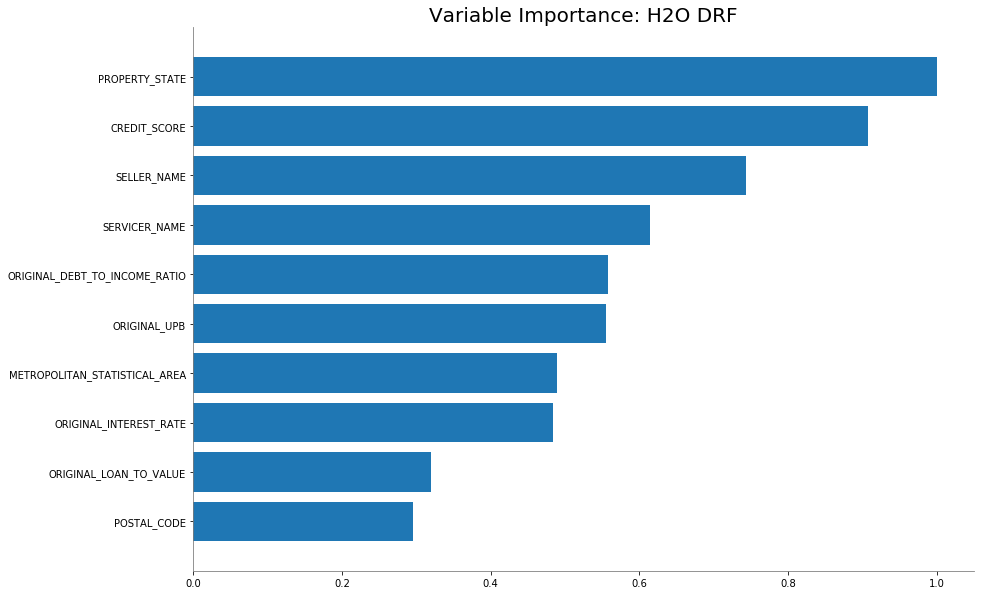

In [479]:
rf.varimp_plot()

In [256]:
rf.model_performance(test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.030996253373301114
RMSE: 0.17605752859023416
LogLoss: 0.13199230669970394
Mean Per-Class Error: 0.24343368064082282
AUC: 0.828849636209264
AUCPR: 0.21692177677742108
Gini: 0.657699272418528

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15746447063982486: 


,,FALSE,TRUE,Error,Rate
0,FALSE,69044.0,3182.0,0.0441,(3182.0/72226.0)
1,TRUE,1718.0,954.0,0.643,(1718.0/2672.0)
2,Total,70762.0,4136.0,0.0654,(4900.0/74898.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.157464,0.280259,185.0
1,max f2,0.075267,0.364653,267.0
2,max f0point5,0.276534,0.292969,114.0
3,max accuracy,0.476778,0.964752,47.0
4,max precision,0.996667,1.000000,0.0
5,max recall,0.000013,1.000000,399.0
6,max specificity,0.996667,1.000000,0.0
7,max absolute_mcc,0.133981,0.256563,204.0
8,max min_per_class_accuracy,0.042232,0.753743,311.0
9,max mean_per_class_accuracy,0.046022,0.756566,305.0



Gains/Lift Table: Avg response rate:  3.57 %, avg score:  3.77 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010000,0.324616,11.713759,11.713759,0.417891,0.433813,0.417891,0.433813,0.117141,0.117141,1071.375906,1071.375906
1,,2,0.020001,0.251877,7.110589,9.412174,0.253672,0.283617,0.335781,0.358715,0.071108,0.188249,611.058857,841.217382
2,,3,0.030001,0.213680,5.127109,7.983819,0.182911,0.232196,0.284824,0.316542,0.051272,0.239521,412.710860,698.381874
3,,4,0.040001,0.186512,5.164533,7.278997,0.184246,0.199657,0.259680,0.287321,0.051647,0.291168,416.453275,627.899725
4,,5,0.050001,0.165986,4.303777,6.683953,0.153538,0.176193,0.238451,0.265095,0.043039,0.334207,330.377729,568.395326
5,,6,0.100003,0.107315,3.136144,4.910049,0.111883,0.132806,0.175167,0.198951,0.156811,0.491018,213.614380,391.004853
6,,7,0.150004,0.079175,2.110722,3.976940,0.075300,0.091532,0.141878,0.163144,0.105539,0.596557,111.072208,297.693971
7,,8,0.201541,0.060000,1.612128,3.372225,0.057513,0.067391,0.120305,0.138659,0.083084,0.679641,61.212769,237.222461
8,,9,0.300008,0.034557,1.033810,2.604721,0.036881,0.045443,0.092924,0.108064,0.101796,0.781437,3.380980,160.472087
9,,10,0.400024,0.021481,0.662319,2.119072,0.023628,0.026312,0.075598,0.087624,0.066243,0.847680,-33.768097,111.907178


## Deep Learning 

In [268]:
from h2o.estimators import H2ODeepLearningEstimator

In [329]:
dl = H2ODeepLearningEstimator(model_id="New_DL_model",
                              hidden=[10,10],
                              epochs=10,                       # note epoch is provided here instead of in train
                              export_weights_and_biases=True,
                              max_runtime_secs=100)

dl.train(x=x, y=y, training_frame=train)
dl.model_performance(test)

deeplearning Model Build progress: |██████████████████████████████████████| 100%

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.20925372324242225
RMSE: 0.4574425901054932
LogLoss: 0.6068452804178831
Mean Per-Class Error: 0.3276176341646859
AUC: 0.7309248645583214
AUCPR: 0.7377184584441348
Gini: 0.4618497291166428

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31530399989867675: 


,,0,1,Error,Rate
0,0,752.0,1563.0,0.6752,(1563.0/2315.0)
1,1,222.0,2463.0,0.0827,(222.0/2685.0)
2,Total,974.0,4026.0,0.357,(1785.0/5000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.315304,0.734019,293.0
1,max f2,0.128287,0.858458,362.0
2,max f0point5,0.598014,0.702072,155.0
3,max accuracy,0.512027,0.674200,202.0
4,max precision,0.976612,1.000000,0.0
5,max recall,0.035362,1.000000,394.0
6,max specificity,0.976612,1.000000,0.0
7,max absolute_mcc,0.598014,0.348492,155.0
8,max min_per_class_accuracy,0.536652,0.670764,188.0
9,max mean_per_class_accuracy,0.598014,0.672382,155.0



Gains/Lift Table: Avg response rate: 53.70 %, avg score: 52.01 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.917423,1.713222,1.713222,0.920,0.940780,0.920000,0.940780,0.017132,0.017132,71.322160,71.322160
1,,2,0.02,0.890555,1.601490,1.657356,0.860,0.904525,0.890000,0.922652,0.016015,0.033147,60.148976,65.735568
2,,3,0.03,0.870702,1.564246,1.626319,0.840,0.880495,0.873333,0.908600,0.015642,0.048790,56.424581,62.631906
3,,4,0.04,0.852904,1.415270,1.573557,0.760,0.862363,0.845000,0.897041,0.014153,0.062942,41.527002,57.355680
4,,5,0.05,0.836531,1.415270,1.541899,0.760,0.845146,0.828000,0.886662,0.014153,0.077095,41.527002,54.189944
5,,6,0.10,0.791037,1.452514,1.497207,0.780,0.809923,0.804000,0.848292,0.072626,0.149721,45.251397,49.720670
6,,7,0.15,0.749697,1.467412,1.487275,0.788,0.769674,0.798667,0.822086,0.073371,0.223091,46.741155,48.727498
7,,8,0.20,0.720476,1.459963,1.480447,0.784,0.735335,0.795000,0.800398,0.072998,0.296089,45.996276,48.044693
8,,9,0.30,0.663899,1.314711,1.425202,0.706,0.692488,0.765333,0.764428,0.131471,0.427561,31.471136,42.520174
9,,10,0.40,0.605688,1.303538,1.394786,0.700,0.634549,0.749000,0.731959,0.130354,0.557914,30.353818,39.478585


In [330]:
dl.scoring_history()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-03-04 00:50:02,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-03-04 00:50:02,0.411 sec,56818 obs/sec,1.0,1,10000.0,0.494697,0.686512,0.017682,0.633081,0.639882,1.491974,0.4345
2,,2020-03-04 00:50:03,1.789 sec,67430 obs/sec,10.0,10,100000.0,0.449559,0.588554,0.188764,0.750474,0.758100,1.813031,0.3543


In [307]:
dl.weights(1) # Weights of the trained model

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
-0.136051,0.244544,0.498893,0.628877,-0.33611,0.145164,0.156553,-0.0430675,0.25279,0.344514
0.568515,0.433277,0.484943,-0.0440656,0.247107,0.0688317,0.0593354,-0.203126,0.393687,-0.501645
-0.521144,-0.302357,-0.39151,-0.200167,-0.0816884,-0.0746527,-0.0793938,-0.229765,-0.453901,-0.0558551
-0.0594717,-0.23894,-0.62836,-0.34112,-0.284174,0.120231,-0.547088,-0.221218,-0.523819,0.162292
-0.414124,-0.0597832,0.308511,-0.000354173,0.188302,-0.0288818,0.197779,0.382259,-0.0705881,0.0318458
-0.287331,-0.323727,0.176089,-0.313284,0.028234,-0.0592566,0.119208,-0.0116629,-0.355036,-0.0648204
0.159053,-0.248458,0.258571,-0.282308,0.452759,-0.0641324,0.467498,0.492435,-0.166129,-0.231782
0.373426,0.138219,-0.256499,-0.0719556,0.423208,0.0086089,0.0867236,0.101754,-0.371006,-0.305707
0.0202741,-0.295892,-0.171638,0.222765,0.0472744,-0.0999544,0.0605103,0.356936,-0.528496,0.207837
-0.0641037,0.00115702,-0.393953,-0.234585,0.47508,-0.430143,-0.0999465,-0.287195,-0.139764,-0.263403


## Reload the model and continue training from that model

In [332]:
# Reload the model from above

#dl_ch = h2o.get_model(model_id= aml.leader.model_id)

# Provide the model id from the above model to the checkpoint argument of the new model, all paramaters must match exactly
dl_ch = H2ODeepLearningEstimator(model_id="New_DL_model_contd",
                              checkpoint = "New_DL_model",
                              hidden=[10,10],
                              epochs=20,                       # note epoch is provided here instead of in train
                              export_weights_and_biases=True,
                              max_runtime_secs=100)

dl_ch.train(x=x, y=y, training_frame=train)
dl_ch.model_performance(test)

deeplearning Model Build progress: |██████████████████████████████████████| 100%

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.20788345580248038
RMSE: 0.45594238210817867
LogLoss: 0.6046006294856857
Mean Per-Class Error: 0.3220909701525554
AUC: 0.7369904798677558
AUCPR: 0.7467691891266097
Gini: 0.4739809597355116

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34415432733651147: 


,,0,1,Error,Rate
0,0,771.0,1544.0,0.667,(1544.0/2315.0)
1,1,220.0,2465.0,0.0819,(220.0/2685.0)
2,Total,991.0,4009.0,0.3528,(1764.0/5000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.344154,0.736480,292.0
1,max f2,0.140649,0.857990,368.0
2,max f0point5,0.568702,0.702546,189.0
3,max accuracy,0.547129,0.678800,199.0
4,max precision,0.993548,1.000000,0.0
5,max recall,0.039672,1.000000,396.0
6,max specificity,0.993548,1.000000,0.0
7,max absolute_mcc,0.568702,0.355121,189.0
8,max min_per_class_accuracy,0.572075,0.676890,187.0
9,max mean_per_class_accuracy,0.568702,0.677909,189.0



Gains/Lift Table: Avg response rate: 53.70 %, avg score: 56.35 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.952764,1.713222,1.713222,0.920,0.965184,0.920000,0.965184,0.017132,0.017132,71.322160,71.322160
1,,2,0.02,0.932582,1.638734,1.675978,0.880,0.941580,0.900000,0.953382,0.016387,0.033520,63.873371,67.597765
2,,3,0.03,0.919043,1.489758,1.613904,0.800,0.925559,0.866667,0.944108,0.014898,0.048417,48.975791,61.390441
3,,4,0.04,0.906147,1.713222,1.638734,0.920,0.912663,0.880000,0.936247,0.017132,0.065549,71.322160,63.873371
4,,5,0.05,0.897141,1.564246,1.623836,0.840,0.901486,0.872000,0.929294,0.015642,0.081192,56.424581,62.383613
5,,6,0.10,0.855501,1.437616,1.530726,0.772,0.875940,0.822000,0.902617,0.071881,0.153073,43.761639,53.072626
6,,7,0.15,0.820416,1.527002,1.529485,0.820,0.836712,0.821333,0.880649,0.076350,0.229423,52.700186,52.948479
7,,8,0.20,0.785196,1.415270,1.500931,0.760,0.802582,0.806000,0.861132,0.070764,0.300186,41.527002,50.093110
8,,9,0.30,0.725948,1.333333,1.445065,0.716,0.755024,0.776000,0.825763,0.133333,0.433520,33.333333,44.506518
9,,10,0.40,0.658702,1.199255,1.383613,0.644,0.693058,0.743000,0.792587,0.119926,0.553445,19.925512,38.361266


In [333]:
dl_ch.scoring_history()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-03-04 00:50:02,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-03-04 00:50:02,0.411 sec,56818 obs/sec,1.0,1,10000.0,0.494697,0.686512,0.017682,0.633081,0.639882,1.491974,0.4345
2,,2020-03-04 00:50:03,1.789 sec,67430 obs/sec,10.0,10,100000.0,0.449559,0.588554,0.188764,0.750474,0.758100,1.813031,0.3543
3,,2020-03-04 00:51:20,2.270 sec,68259 obs/sec,12.0,11,120000.0,0.449795,0.589443,0.187910,0.749887,0.755192,1.794145,0.3464
4,,2020-03-04 00:51:21,3.319 sec,74294 obs/sec,20.0,15,200000.0,0.447259,0.584562,0.197041,0.758914,0.764518,1.775260,0.3333


## Variable importance in smaller models calculated by default

In [370]:
train = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv")

splits = train.split_frame(ratios=[0.75], seed=1234)

x_col = splits[0].columns
y_col = "class"
x_col.remove(y)

dl = H2ODeepLearningEstimator(model_id="New_iris",
                              hidden=[4,4],
                              epochs=20,                       # note epoch is provided here instead of in train
                              export_weights_and_biases=True,
                              max_runtime_secs=100)

dl.train(x=x_col, y=y_col, training_frame=splits[0])

dl.model_performance(splits[1])

Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%

ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.053887697807961245
RMSE: 0.23213723916675078
LogLoss: 0.22072045988785519
Mean Per-Class Error: 0.05555555555555555

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
0,15.0,0.0,0.0,0.000000,0 / 15
1,0.0,10.0,2.0,0.166667,2 / 12
2,0.0,0.0,6.0,0.000000,0 / 6
3,15.0,10.0,8.0,0.060606,2 / 33



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.939394
1,2,1.000000
2,3,1.000000


In [375]:
# Look at the network, variable importance is turned off for large networks (default)
dl

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  New_iris_contd


Status of Neuron Layers: predicting class, 3-class classification, multinomial distribution, CrossEntropy loss, 55 weights/biases, 4.1 KB, 3,202 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,4,Input,0,,,,,,,,,
1,,2,4,Rectifier,0,0,0,0.00138081,0.000785649,0,0.0502182,0.643404,0.564398,0.322376
2,,3,4,Rectifier,0,0,0,0.000623296,0.000259198,0,-0.0715868,0.549129,0.813443,0.41253
3,,4,3,Softmax,,0,0,0.015087,0.027768,0,-0.597676,1.98736,0.916507,1.65428




ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.03612705376175635
RMSE: 0.19007118077645635
LogLoss: 0.1597239412917021
Mean Per-Class Error: 0.033891547049441785

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
0,35.0,0.0,0.0,0.000000,0 / 35
1,0.0,35.0,3.0,0.078947,3 / 38
2,0.0,1.0,43.0,0.022727,1 / 44
3,35.0,36.0,46.0,0.034188,4 / 117



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.965812
1,2,1.000000
2,3,1.000000



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error
0,,2020-03-04 01:10:36,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2020-03-04 01:10:36,0.046 sec,78000 obs/sec,2.000000,1,234.0,0.679082,1.384462,0.310990,0.623932
2,,2020-03-04 01:10:36,0.071 sec,90000 obs/sec,20.000000,10,2340.0,0.233788,0.213118,0.918337,0.051282
3,,2020-03-04 01:11:08,0.201 sec,57239 obs/sec,22.504274,11,2633.0,0.212239,0.196136,0.932698,0.051282
4,,2020-03-04 01:11:08,0.213 sec,57178 obs/sec,27.367521,13,3202.0,0.190071,0.159724,0.946022,0.034188



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,petal_wid,1.000000,1.000000,0.339784
1,petal_len,0.745005,0.745005,0.253141
2,sepal_len,0.627780,0.627780,0.213310
3,sepal_wid,0.570262,0.570262,0.193766


In [373]:
dl = H2ODeepLearningEstimator(model_id="New_iris_contd",
                              checkpoint="New_iris",
                              hidden=[4,4],
                              epochs=25,                       # note epoch is provided here instead of in train
                              export_weights_and_biases=True,
                              max_runtime_secs=100)

dl.train(x=x_col, y=y_col, training_frame=splits[0])

dl.model_performance(splits[1])

deeplearning Model Build progress: |██████████████████████████████████████| 100%

ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.032482450301030606
RMSE: 0.1802288830932229
LogLoss: 0.150628045856322
Mean Per-Class Error: 0.027777777777777776

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
0,15.0,0.0,0.0,0.000000,0 / 15
1,0.0,11.0,1.0,0.083333,1 / 12
2,0.0,0.0,6.0,0.000000,0 / 6
3,15.0,11.0,7.0,0.030303,1 / 33



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.969697
1,2,1.000000
2,3,1.000000


In [374]:
# Look at the network, variable importance is turned off for large networks (default)
dl 

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  New_iris_contd


Status of Neuron Layers: predicting class, 3-class classification, multinomial distribution, CrossEntropy loss, 55 weights/biases, 4.1 KB, 3,202 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,4,Input,0,,,,,,,,,
1,,2,4,Rectifier,0,0,0,0.00138081,0.000785649,0,0.0502182,0.643404,0.564398,0.322376
2,,3,4,Rectifier,0,0,0,0.000623296,0.000259198,0,-0.0715868,0.549129,0.813443,0.41253
3,,4,3,Softmax,,0,0,0.015087,0.027768,0,-0.597676,1.98736,0.916507,1.65428




ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.03612705376175635
RMSE: 0.19007118077645635
LogLoss: 0.1597239412917021
Mean Per-Class Error: 0.033891547049441785

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
0,35.0,0.0,0.0,0.000000,0 / 35
1,0.0,35.0,3.0,0.078947,3 / 38
2,0.0,1.0,43.0,0.022727,1 / 44
3,35.0,36.0,46.0,0.034188,4 / 117



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.965812
1,2,1.000000
2,3,1.000000



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error
0,,2020-03-04 01:10:36,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2020-03-04 01:10:36,0.046 sec,78000 obs/sec,2.000000,1,234.0,0.679082,1.384462,0.310990,0.623932
2,,2020-03-04 01:10:36,0.071 sec,90000 obs/sec,20.000000,10,2340.0,0.233788,0.213118,0.918337,0.051282
3,,2020-03-04 01:11:08,0.201 sec,57239 obs/sec,22.504274,11,2633.0,0.212239,0.196136,0.932698,0.051282
4,,2020-03-04 01:11:08,0.213 sec,57178 obs/sec,27.367521,13,3202.0,0.190071,0.159724,0.946022,0.034188



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,petal_wid,1.000000,1.000000,0.339784
1,petal_len,0.745005,0.745005,0.253141
2,sepal_len,0.627780,0.627780,0.213310
3,sepal_wid,0.570262,0.570262,0.193766


## Stacking and Ensembling

In [476]:
# Number of CV folds (to generate level-one data for stacking)
nfolds = 5

# There are a few ways to assemble a list of models to stack together:
# 1. Train individual models and put them in a list
# 2. Train a grid of models
# 3. Train several grids of models
# Note: All base models must have the same cross-validation folds and
# the cross-validated predicted values must be kept.


# 1. Generate a 2-model ensemble (GBM + RF)

# Train and cross-validate a GBM
my_gbm = H2OGradientBoostingEstimator(distribution="bernoulli",
                                      ntrees=10,
                                      max_depth=3,
                                      min_rows=2,
                                      learn_rate=0.2,
                                      nfolds=nfolds,
                                      fold_assignment="Modulo",
                                      keep_cross_validation_predictions=True,
                                      seed=1)
my_gbm.train(x=x, y=y, training_frame=train)


# Train and cross-validate a RF
my_rf = H2ORandomForestEstimator(ntrees=50,
                                 nfolds=nfolds,
                                 fold_assignment="Modulo",
                                 keep_cross_validation_predictions=True,
                                 seed=1)
my_rf.train(x=x, y=y, training_frame=train)


# Train a stacked ensemble using the GBM and GLM above
ensemble = H2OStackedEnsembleEstimator(model_id="my_ensemble_binomial",
                                       base_models=[my_gbm, my_rf])
ensemble.train(x=x, y=y, training_frame=train)

# Eval ensemble performance on the test data
perf_stack_test = ensemble.model_performance(test)

# Compare to base learner performance on the test set
perf_gbm_test = my_gbm.model_performance(test)
perf_rf_test = my_rf.model_performance(test)
baselearner_best_auc_test = max(perf_gbm_test.auc(), perf_rf_test.auc())
stack_auc_test = perf_stack_test.auc()
print("Best Base-learner Test AUC:  {0}".format(baselearner_best_auc_test))
print("Ensemble Test AUC:  {0}".format(stack_auc_test))

# Generate predictions on a test set (if neccessary)
pred = ensemble.predict(test)


# 2. Generate a random grid of models and stack them together

# Specify GBM hyperparameters for the grid
hyper_params = {"learn_rate": [0.01, 0.03],
                "max_depth": [3, 4, 5, 6, 9],
                "sample_rate": [0.7, 0.8, 0.9, 1.0],
                "col_sample_rate": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}
search_criteria = {"strategy": "RandomDiscrete", "max_models": 3, "seed": 1}

# Train the grid
grid = H2OGridSearch(model=H2OGradientBoostingEstimator(ntrees=10,
                                                        seed=1,
                                                        nfolds=nfolds,
                                                        fold_assignment="Modulo",
                                                        keep_cross_validation_predictions=True),
                     hyper_params=hyper_params,
                     search_criteria=search_criteria,
                     grid_id="gbm_grid_binomial")
grid.train(x=x, y=y, training_frame=train)

# Train a stacked ensemble using the GBM grid
ensemble = H2OStackedEnsembleEstimator(model_id="my_ensemble_gbm_grid_binomial",
                                       base_models=grid.model_ids)
ensemble.train(x=x, y=y, training_frame=train)

# Eval ensemble performance on the test data
perf_stack_test = ensemble.model_performance(test)

# Compare to base learner performance on the test set
baselearner_best_auc_test = max([h2o.get_model(model).model_performance(test_data=test).auc() for model in grid.model_ids])
stack_auc_test = perf_stack_test.auc()
print("Best Base-learner Test AUC:  {0}".format(baselearner_best_auc_test))
print("Ensemble Test AUC:  {0}".format(stack_auc_test))

# Generate predictions on a test set (if neccessary)
pred = ensemble.predict(test)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
stackedensemble Model Build progress: |███████████████████████████████████| 100%
Best Base-learner Test AUC:  0.8387563805045739
Ensemble Test AUC:  0.8461841607331677
stackedensemble prediction progress: |████████████████████████████████████| 100%
gbm Grid Build progress: |████████████████████████████████████████████████| 100%
stackedensemble Model Build progress: |███████████████████████████████████| 100%
Best Base-learner Test AUC:  0.8253576317997848
Ensemble Test AUC:  0.8277895773678462
stackedensemble prediction progress: |████████████████████████████████████| 100%
